<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

### Решения

#### a) $f(x) = x^2 - 30x + 1$

Производная: $f'(x)=2x-30$

Критические точки, где $f'(x)=0$: $2x-30=0 \implies x=15$

Тип экстремума определим по 2-й производной: $f''(x)=2$

Так как $f''(15)>0$, то $x=15$ - точка минимума

$f(15)=15^2-30\cdot15+1=221$

#### b) $g(x) = -x^3 + 5x - 7x^2 + 17$

Производная: $g'(x)=-3x^2+5-14x$

Критические точки - корни уравнения: $-3x^2-14x+5 = 0$

$D = b^2 - 4ac = (-14)^2 - 4(-3)(5) = 196 + 60 = 256$

$x_{1,2} = \frac{-b \pm \sqrt{D}}{2a} = \frac{14 \pm 16}{-6}$

Находим корни: $x_1 = \frac{30}{-6} = -5, \quad x_2 = \frac{-2}{-6} = \frac{1}{3}$

Тип экстремума через 2-ю производную: $g''(x) = -6x-14$

Для $x_1=-5$,  $g''(-5) = 30-14 = 16 > 0$ - локальный минимум $g(x_1)=-(-5)^3-7(-5)^2+5\cdot(-5)+17= -58$

Для $x_2=\frac{1}{3}$,  $g''(\frac{1}{3}) = -2-14 = -16 < 0$ - локальный максимум $g(x_2)=-\frac{1}{3}^3-7\cdot\frac{1}{3}^2+5\cdot\frac{1}{3}+17= 17\frac{23}{27}$


#### c) $h(x) = x^2 - 1/x$

Очевидно, что ф-я не определена в точке 0.

Производная: $h'(x) = 2x+x^{-2}$ для любого $x \neq 0$.

$2x+x^{-2} = 0$ (домножим на $x^2$) $\implies 2x^3+1=0 \implies x^3=-2^{-1} \implies x_0 = -2^{-1/3}$ (извиняюсь за степени, но так запись без 3-этажных дробей)

2-я производная: $h''(x) = 2-2x^{-3}$

$h''(x_0)=2-2(-2^{-1/3})^{-3} = 2 - 2 \cdot (-2) = 6 > 0 \implies$  локальный минимум в области $x<0$.

$h(x_0) = (-2^{-1/3})^2 - (-2^{-1/3})^{-1} = 4^{-1/3} + 2^{1/3} \approx 1.88988$

В области $x>0$ производная $h'(x) > 0$ и ф-я монотонно возрастает.

#### d) $j(x) = 1/x^5 + x^{17} + 8$

Ф-я неопределена в точке 0.

Производная: $j'(x) = 17x^{16} - 5x^{-6}$ 

Критические точки: $j'(x)=0 \implies \frac{17x^{22}-5}{x^6}=0 \implies x^{22} = \frac{5}{17} \implies x_{1,2}= ±(\frac{5}{17})^{1/22}$

2-я производная: $j''(x) = 272x^{15} + 30x^{-7} = \frac{272x^{22} + 30}{x^7}$

Проверим $j''(x_{1,2})= \frac{272 \cdot \frac{5}{17} + 30}{±(\frac{5}{17})^{7/22}} = ±110 \cdot (\frac{5}{17})^{-7/22}$

$x_1 > 0 \implies j''(x_1) > 0 \implies x_1$ - локальный минимум.

$x_2 < 0 \implies j''(x_2) < 0 \implies x_2$ - локальный максимум.


## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [243]:
# your code here
import sympy as sp
import random

x = sp.Symbol('x', real=True)  # Будем решать только в вещественных числах


In [244]:
# Находим 1 и 2 производные, критические точки и точки перегиба (все понадобится ниже)
def double_diff(func, real_only=True):
    # Первая производная
    func_diff = sp.diff(func, x)
    crit_points = sp.solve(func_diff, x)

    # Вторая производная
    func_diff2 = sp.diff(func_diff, x)
    bend_points = sp.solve(func_diff2, x)
    
    if real_only:
        crit_points = [p for p in crit_points if p.is_real]
        bend_points = [p for p in bend_points if p.is_real]
    return func_diff, crit_points, func_diff2, bend_points

In [245]:
# Функция a: f(x) = x^2 - 30x + 1
f = x**2 - 30*x + 1

f_diff, crit_points_f, f_diff2, bend_points_f = double_diff(f) 

print("Экстремумы функции f(x):")
for point in crit_points_f:
    print(f"Критическая точка: {point}, Вторая производная: {f_diff2.subs(x, point)}")

Экстремумы функции f(x):
Критическая точка: 15, Вторая производная: 2


In [246]:
# Функция b: g(x) = -x^3 + 5x - 7x^2 + 17
g = -x**3 + 5*x - 7*x**2 + 17

g_diff, crit_points_g, g_diff2, bend_points_g = double_diff(g)

print("\nЭкстремумы функции g(x):")
for point in crit_points_g:
    print(f"Критическая точка: {point}, Вторая производная: {g_diff2.subs(x, point)}")


Экстремумы функции g(x):
Критическая точка: -5, Вторая производная: 16
Критическая точка: 1/3, Вторая производная: -16


In [248]:
# Функция c: h(x) = x^2 - 1/x
h = x**2 - (1/x)
h_diff, crit_points_h, h_diff2, bend_points_h = double_diff(h)

print("\nЭкстремумы функции h(x):")
for point in crit_points_h:
    print(f"Критическая точка: {point} (={float(point)}), Вторая производная: {h_diff2.subs(x, point)}")


Экстремумы функции h(x):
Критическая точка: -2**(2/3)/2 (=-0.7937005259840997), Вторая производная: 6


In [250]:
# Функция d: j(x) = 1/x^5 + x^17 + 8
j = (1/x**5) + x**17 + 8
j_diff, crit_points_j, j_diff2, bend_points_j = double_diff(j)

print("\nЭкстремумы функции j(x):")
for point in crit_points_j:
    print(f"Критическая точка: {point} (={float(point)}), Вторая производная: {j_diff2.subs(x, point)} (={float(j_diff2.subs(x, point))}))")


Экстремумы функции j(x):
Критическая точка: -17**(21/22)*5**(1/22)/17 (=-0.9458926861215569), Вторая производная: -22*17**(7/22)*5**(15/22) (=-162.36769047742382))
Критическая точка: 17**(21/22)*5**(1/22)/17 (=0.9458926861215569), Вторая производная: 22*17**(7/22)*5**(15/22) (=162.36769047742382))


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

a) Функция $f(x) = x^2 - 30x + 1$ не имеет перегибов, т.к. $f''(x) = 2 > 0$.

b) $g(x) = -x^3 + 5x - 7x^2 + 17$ имеет перегибы, т.к. $\exists x_0 \in \mathbb{R} g''(x_0) = 0$.

$g''(x) = -6x-14=0 \implies -6x-14=0 \implies x_0 = -\frac{14}{6} = -\frac{7}{3} \approx -2.(3)$

c) $h(x) = x^2-\frac{1}{x}$ имеет перегибы, т.к. $\exists x_0 \in \mathbb{R} h''(x_0) = 0$.

$h''(x)=2-2x^{-3}=0 \implies \frac{2x^3-2}{x^3}=0 \implies 2x^3-2=0 \implies x^3=1 \implies x_0=1$

d) $j(x) = 1/x^5 + x^{17} + 8$ не имеет перегибов, т.к. $j''(x) = \frac{272x^{22} + 30}{x^7} \ne 0$

Доказательство: Если $j''(x) = 0 \iff 272x^{22} + 30 = 0 \implies x^{22}=-\frac{30}{272}<0$ что невозможно в действительных числах.



## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [251]:
# уже нашли - см ф-цию выше.

print("Точки перегиба функции f(x):")
if len(bend_points_f) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_f:
        print(f"Точка перегиба: {point}")

print("\nТочки перегиба функции g(x):")
if len(bend_points_g) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_g:
        print(f"Точка перегиба: {point}")


print("\nТочки перегиба функции h(x):")
if len(bend_points_h) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_h:
        print(f"Точка перегиба: {point}")

print("\nТочки перегиба функции j(x):")
if len(bend_points_j) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_j:
        print(f"Точка перегиба: {point}")

Точки перегиба функции f(x):
Точки перегиба не найдены.

Точки перегиба функции g(x):
Точка перегиба: -7/3

Точки перегиба функции h(x):
Точка перегиба: 1

Точки перегиба функции j(x):
Точки перегиба не найдены.


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

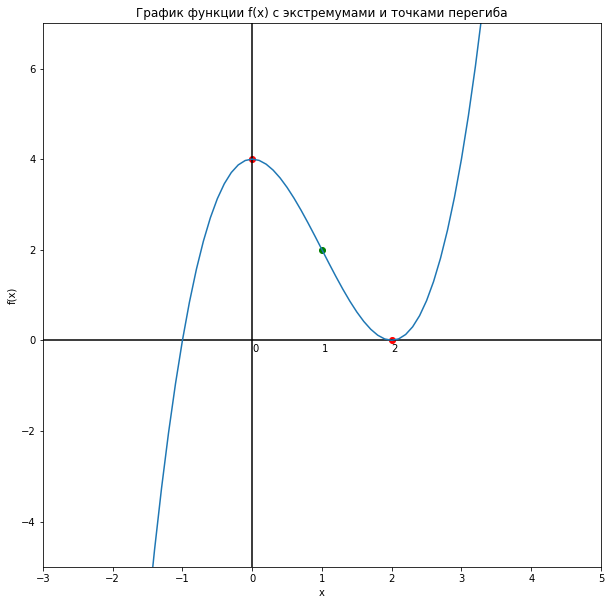

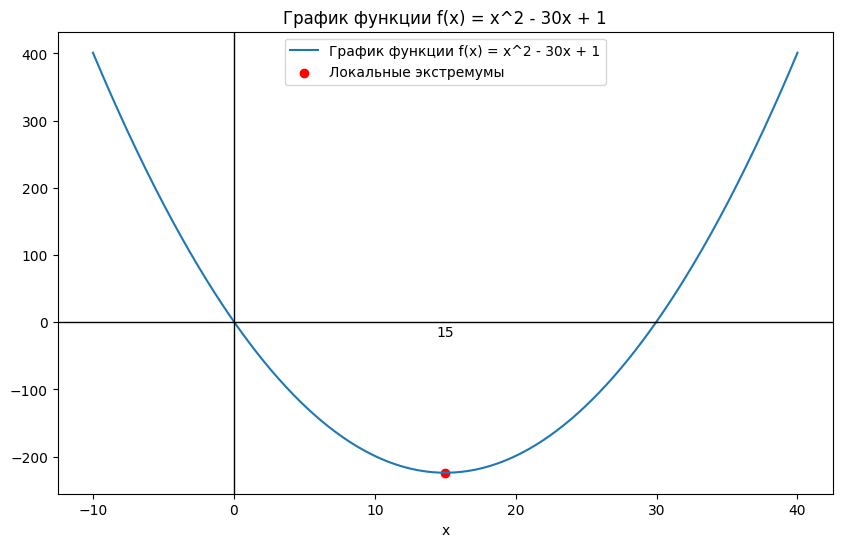

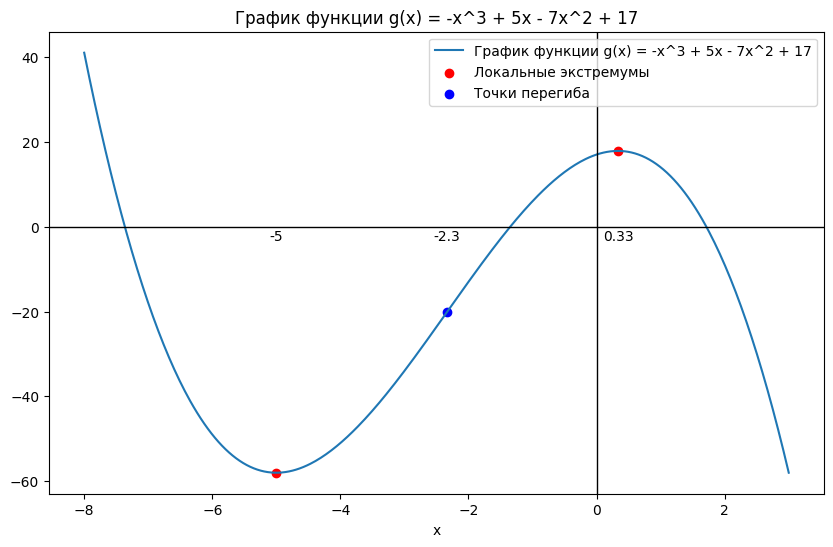

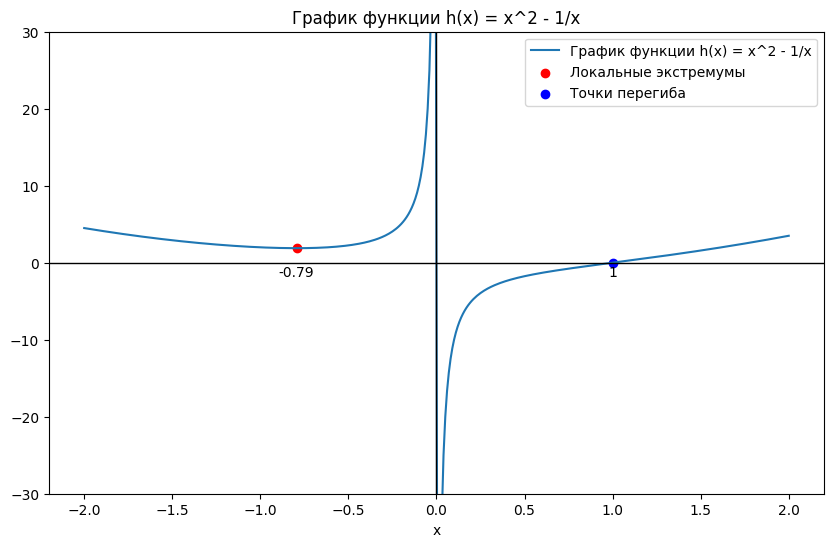

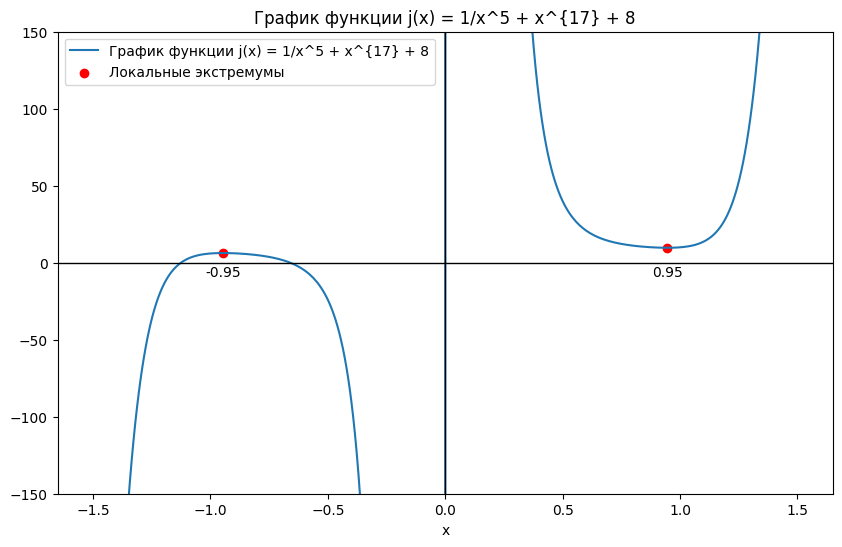

<module 'matplotlib.pyplot' from '/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [252]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

# Экстреммумы и критические точки уже получены выше


# Преобразуем критические точки в числовые значения для графиков
crit_points_f = [float(point) for point in crit_points_f]
crit_points_g = [float(point) for point in crit_points_g]
crit_points_h = [float(point) for point in crit_points_h]
crit_points_j = [float(point) for point in crit_points_j]

bend_points_f = [float(point) for point in bend_points_f]
bend_points_g = [float(point) for point in bend_points_g]
bend_points_h = [float(point) for point in bend_points_h]
bend_points_j = [float(point) for point in bend_points_j]


# Создаем диапазон значений для графиков
x_vals_f = np.linspace(-10, 40, 400)
x_vals_g = np.linspace(-8, 3, 400)
x_vals_h = [*np.linspace(-2, -0.01, 200), *np.linspace(0.01, 2, 200)]  # Избегаем деления на ноль
x_vals_j = [*np.linspace(-1.5, -0.01, 200), *np.linspace(0.01, 1.5, 200)]  # Избегаем деления на ноль

# Функция для построения графиков
def plot_function(func, x_vals, crits, bends, title, y_limits=None, extra_points=None, extra_points_color='yellow', extra_points_label=None):
    y_vals = [func.evalf(subs={x: val}) for val in x_vals]
    
    plt.figure(figsize=(10, 6), frameon=False)
    plt.plot(x_vals, y_vals, label=title)

    # Добавление дополнительных точек
    if extra_points:
        plt.scatter(extra_points, [func.evalf(subs={x: point}) for point in extra_points], color=extra_points_color, label=extra_points_label, marker='x')
        plt.annotate(f'{extra_points[-1]:.2g}', (extra_points[-1], 0), textcoords="offset points", xytext=(0, 10), ha='center')
    elif extra_points_label:  # если данных нет, но подпись есть - так и напишем
        plt.scatter(0, 0, color='black', marker='.', label=extra_points_label)
    
    # Отметка локальных экстремумов
    if crits:
        plt.scatter(crits, [func.evalf(subs={x: point}) for point in crits], color='red', label='Локальные экстремумы')
        for point in crits:
            plt.annotate(f'{point:.2g}', (point, 0), textcoords="offset points", xytext=(0,-10), ha='center')

    # Отметка точек перегиба
    if bends:
        plt.scatter(bends, [func.evalf(subs={x: point}) for point in bends], color='blue', label='Точки перегиба')
        for point in bends:
            plt.annotate(f'{point:.2g}', (point, 0), textcoords="offset points", xytext=(0,-10), ha='center')

    plt.xlabel('x')
    plt.title(title)
    plt.legend()
    plt.axhline(0, color='black', lw=1, ls='-')
    plt.axvline(0, color='black', lw=1, ls='-')
    if y_limits:
        plt.ylim(y_limits)

    plt.show()
    return plt

# Построение графиков для всех функций
plot_function(f, x_vals_f, crit_points_f, bend_points_f, 'График функции f(x) = x^2 - 30x + 1')
plot_function(g, x_vals_g, crit_points_g, bend_points_g, 'График функции g(x) = -x^3 + 5x - 7x^2 + 17')
plot_function(h, x_vals_h, crit_points_h, bend_points_h, 'График функции h(x) = x^2 - 1/x', y_limits=(-30, 30))
plot_function(j, x_vals_j, crit_points_j, bend_points_j, 'График функции j(x) = 1/x^5 + x^{17} + 8', y_limits=(-150, 150))

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [255]:
# your code here
def gradient_descent_new(f, df, x_start, learning_rate, epsilon=1e-6, delta=1e-6, num_iterations=100, stop_at_num=False):
    '''Реализация градиентного спуска с доп.условием на 1-ю производную.
    
    Args:
      f              - функция, для которой ищем минимум
      df             - производная функции (чтобы не вычислять ее каждый раз при переборе)
      x_start        - начальная точка
      learning_rate  - скорость обучения
      epsilon        - условие останова 1: |x_new - x| < epsilon
      delta          - условие останова 2: |df(x)| < delta 
      num_iterations - максимальное число итераций
    
    Returns:
      x_new - точка минимума,
      trace - список точек, по которым мы искали минимум,
      bool  - было ли достигнуто условие останова.

    '''
    x_curr = x_start

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df.subs(x, x_curr)
      if x_new not in [sp.nan, sp.oo, -sp.oo, sp.zoo]:
        trace.append(x_new)

        try:  
          if (abs(x_new - x_curr) < epsilon) or (abs(df.subs(x, x_new)) < delta) and (not stop_at_num):
            return x_new, trace, True
        except:
            break
    
      x_curr = x_new
      
    return x_new, trace, False

In [254]:
# Проверка
x_start = 1
learning_rate = 0.01
epsilon = 1e-6
delta = 1e-6
num_iterations = 100

min_x, trace, is_stop = gradient_descent_new(j, j_diff, x_start, learning_rate, epsilon, delta, num_iterations)

print(f"Минимум найден в точке x = {min_x}, значение функции j(x) = {j.subs(x, min_x)}, найденное в {len(trace)} шагах. Останов был: {is_stop}")

Минимум найден в точке x = 0.945892950466199, значение функции j(x) = 9.70908799027719, найденное в 27 шагах. Останов был: True


## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [263]:
def find_best_initial_conditions(func, dfunc, learning_rates=[0.01, 0.1, 0.5], epsilon=1e-6, delta=1e-6, num_iterations=30, debug=False):
    """Подбирает начальное приближение и шаг градиентного спуска для нахождения минимума функции.

    Args:
        f (SymPy object): Функция для минимизации.
        df (SymPy object): Производная функции func.
        epsilon (float, optional): Порог для изменения x. По умолчанию 1e-6.
        delta (float, optional): Порог для производной (условие остановки). По умолчанию 1e-6.
        num_iterations (int, optional): Максимальное количество итераций. По умолчанию 100.

    Returns:
        best_x_start (float): Лучшее начальное приближение.
        best_learning_rate (float): Лучший learning_rate.
        best_trace (list): След значений x в каждой итерации.
    """
    
    best_x_start = None
    best_learning_rate = None
    best_trace = []
    best_stop = False
    min_value = float('inf')

    # 100 попыток для случайного старта
    for _ in range(100): 

        # Случайный старт в диапазоне [-10, 10] - подходит для всех функций в задании
        x_start = random.uniform(-10, 10)
        
        # Перебор learning_rates
        for l_rate in learning_rates:
            
            x_min, trace, is_stop = gradient_descent_new(func, dfunc, x_start, l_rate, epsilon, delta, num_iterations)
            if sp.nan == x_min:
                continue
            
            value_at_x_min = func.subs(x, x_min)

            if debug:
                print(f"{x_start=:.4g}, {l_rate=}, {x_min=}, {value_at_x_min=}, итераций: {len(trace)}, stop: {is_stop}")

            # Если минимум уменьшился и алгоритм сошелся, то сохраним это состояние
            if value_at_x_min < min_value and is_stop:
                min_value = value_at_x_min
                best_x_start = x_start
                best_learning_rate = l_rate
                best_trace = trace
                best_stop = is_stop

    return best_x_start, best_learning_rate, best_trace, best_stop

In [264]:
print("\nfunc=f")
f_best_x_start, f_best_learning_rate, f_best_trace, f_best_stop = find_best_initial_conditions(f, f_diff)
if f_best_stop:
    print(f"\nЛучшее начальное приближение: {f_best_x_start:.4f}, Лучший learning_rate: {f_best_learning_rate}")
    print(f"След лучшего минимума: {f_best_trace}")
    print(f"Был останов? {f_best_stop}")
else:
    print("НЕ СОШЛОСЬ")

print("\nfunc=g")
g_best_x_start, g_best_learning_rate, g_best_trace, g_best_stop = find_best_initial_conditions(g, g_diff)
if g_best_stop:
    print(f"\nЛучшее начальное приближение: {g_best_x_start:.4f}, Лучший learning_rate: {g_best_learning_rate}")
    print(f"След лучшего минимума: {g_best_trace}")
    print(f"Был останов? {g_best_stop}")
else:
    print("НЕ СОШЛОСЬ")

print("\nfunc=h")
h_best_x_start, h_best_learning_rate, h_best_trace, h_best_stop = find_best_initial_conditions(h, h_diff, learning_rates=[0.1, 0.2, 0.3])
if h_best_stop:
    print(f"\nЛучшее начальное приближение: {h_best_x_start:.4f}, Лучший learning_rate: {h_best_learning_rate}")
    print(f"След лучшего минимума: {h_best_trace}")
    print(f"Был останов? {h_best_stop}")
else:
    print("НЕ СОШЛОСЬ")

print("\nfunc=j")
j_best_x_start, j_best_learning_rate, j_best_trace, j_best_stop = find_best_initial_conditions(j, j_diff,  learning_rates=[0.01])
if j_best_stop:
    print(f"\nЛучшее начальное приближение: {j_best_x_start}, Лучший learning_rate: {j_best_learning_rate}")
    print(f"След лучшего минимума: {j_best_trace}, ")
    print(f"Был останов? {j_best_stop}")
else:
    print("НЕ СОШЛОСЬ")




func=f

Лучшее начальное приближение: -9.5943, Лучший learning_rate: 0.5
След лучшего минимума: [-9.594310381748492, 15.0000000000000]
Был останов? True

func=g

Лучшее начальное приближение: -2.8720, Лучший learning_rate: 0.1
След лучшего минимума: [-2.8719687992539473, -4.91826368304303, -5.04703754252128, -4.97111371536530, -5.01708144554882, -4.98966359993610, -5.00616978768846, -4.99628670750289, -5.00222383893592, -4.99866421300057, -5.00080093690159, -4.99951924540907, -5.00028838341706, -4.99982694500026, -5.00010382401543, -4.99993770235691, -5.00003737742155, -4.99997757312795, -5.00001345597234, -4.99999192636228, -5.00000484416308, -4.99999709349511, -5.00000174390040, -4.99999895365885, -5.00000062780436, -4.99999962331726, -5.00000022600960]
Был останов? True

func=h

Лучшее начальное приближение: 1.1447, Лучший learning_rate: 0.2
След лучшего минимума: [1.1447104330056241, 0.534196678245137, -0.380336110882433, -1.61079631974803, -1.04355903997588, -0.809787544203381, -

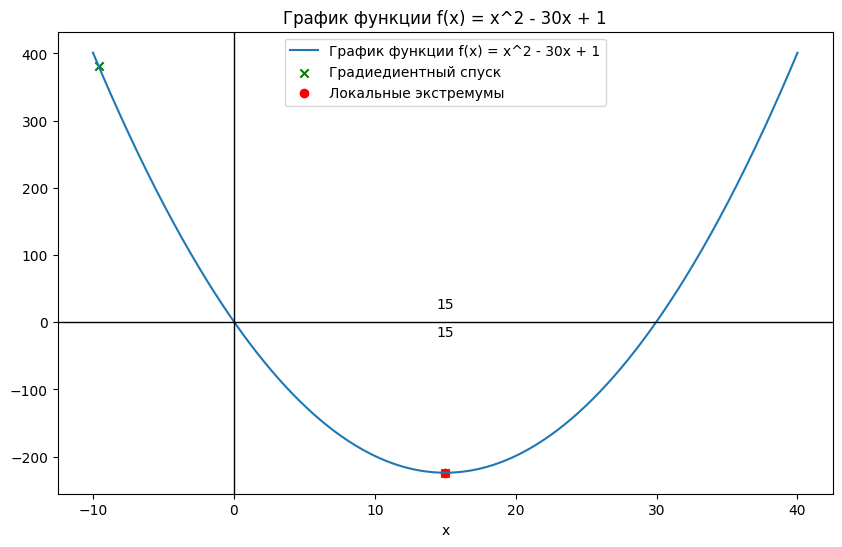

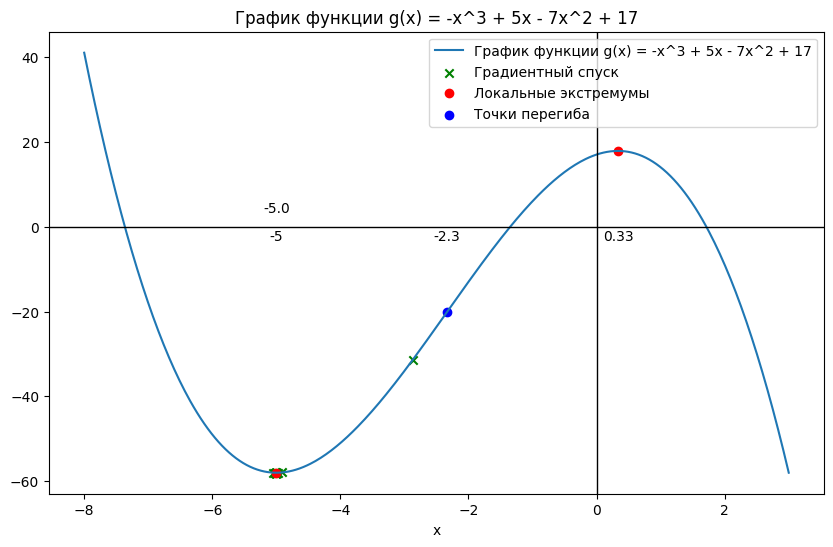

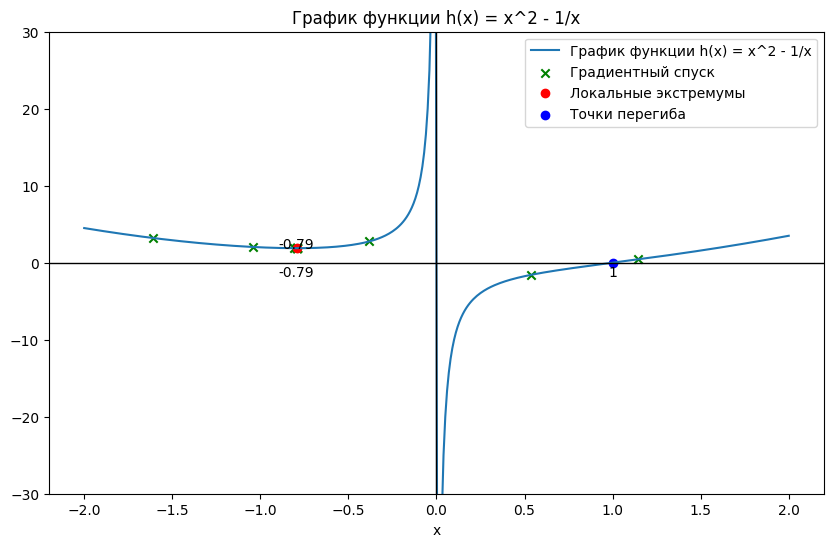

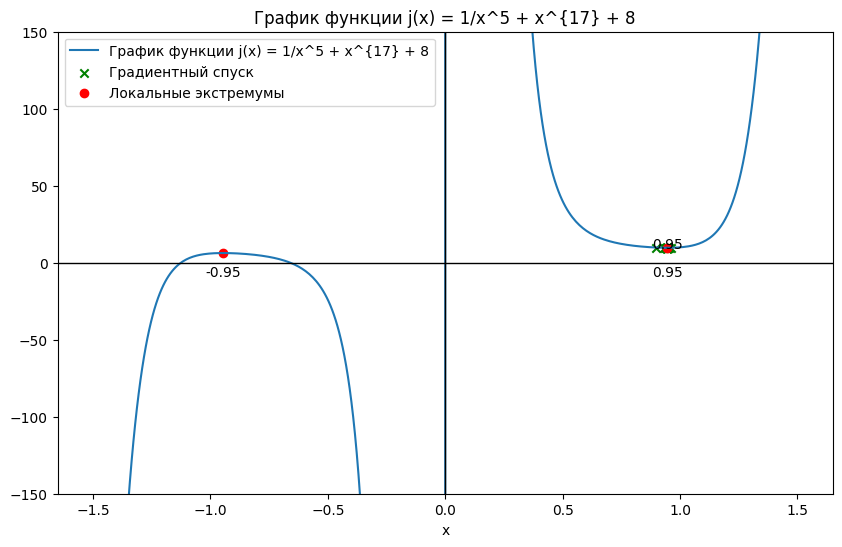

<module 'matplotlib.pyplot' from '/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [265]:
plot_function(f, x_vals_f, crit_points_f, bend_points_f, 'График функции f(x) = x^2 - 30x + 1', extra_points=f_best_trace, extra_points_color='green', extra_points_label='Градиедиентный спуск')
plot_function(g, x_vals_g, crit_points_g, bend_points_g, 'График функции g(x) = -x^3 + 5x - 7x^2 + 17', extra_points=g_best_trace, extra_points_color='green', extra_points_label='Градиентный спуск')
plot_function(h, x_vals_h, crit_points_h, bend_points_h, 'График функции h(x) = x^2 - 1/x', y_limits=(-30, 30), extra_points=h_best_trace, extra_points_color='green', extra_points_label='Градиентный спуск')
plot_function(j, x_vals_j, crit_points_j, bend_points_j, 'График функции j(x) = 1/x^5 + x^{17} + 8', y_limits=(-150, 150), extra_points=j_best_trace, extra_points_color='green', extra_points_label='Градиентный спуск')

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [266]:
# your code here
def gradient_descent_Newton(f, df, d2f, x_start, epsilon=1e-6, num_iterations=300, stop_at_num=False):
    '''Реализация градиентного спуска методом Ньютона для минимизации функции f.

    Args:
      f              - функция, для которой ищем минимум
      df             - производная функции (чтобы не вычислять ее каждый раз при переборе)
      d2f            - вторая производная функции (чтобы не вычислять ее каждый раз при переборе)
      x_start        - начальная точка
      epsilon        - условие останова 1: |x_new - x| < epsilon
      num_iterations - максимальное число итераций
    
    Returns:
      x_new (float) - точка минимума
      trace (list)  - список точек, по которым мы искали минимум
      bool          - было ли достигнуто условие останова
    '''
    x_curr = x_start
    trace = [x_curr]

    for i in range(num_iterations):
        
        df_value = df.subs(x, x_curr)
        df2_value = d2f.subs(x, x_curr)

        if df2_value == 0:
            print("Гессиан равен нулю, метод не может продолжаться.")
            break

        # Обновляем значение x с использованием метода Ньютона
        x_new = x_curr - float(df_value / df2_value)
        trace.append(x_new)

        # Условие остановки по изменению x
        try:  
          if abs(x_new - x_curr) < epsilon and (not stop_at_num):
            return x_new, trace, True
        except:
            break

        # Обновляем текущее значение
        x_curr = x_new

    return float(x_curr), trace, False

In [267]:
# Проверка
x_start = -2.4

min_x, trace, is_stop = gradient_descent_Newton(g, g_diff, g_diff2, x_start, stop_at_num=True)

print(f"Минимум найден в точке x = {min_x}, значение функции g(x) = {g.subs(x, min_x)}, найденное в {len(trace)} шагах. Останов был: {is_stop}")

Минимум найден в точке x = -5.0, значение функции g(x) = -58.0000000000000, найденное в 301 шагах. Останов был: False


## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [268]:
# f
f_x_start_2 = 1
f_min_x_2, f_trace_2, f_is_stop_2 = gradient_descent_Newton(f, f_diff, f_diff2, f_x_start_2)
print(f"x_0= {f_x_start_2}, x_min= {f_min_x_2}, f(x_min) = {f.subs(x, f_min_x_2)}, шаги= {len(f_trace_2)}. Останов был: {f_is_stop_2}")

# g
g_x_start_2 = -3
g_min_x_2, g_trace_2, g_is_stop_2 = gradient_descent_Newton(g, g_diff, g_diff2, g_x_start_2)
print(f"x_0= {g_x_start_2}, x_min= {g_min_x_2}, g(x_min) = {g.subs(x, g_min_x_2)}, шаги= {len(g_trace_2)}. Останов был: {g_is_stop_2}")

# h
h_x_start_2 = -1
h_min_x_2, h_trace_2, h_is_stop_2 = gradient_descent_Newton(h, h_diff, h_diff2, h_x_start_2)
print(f"x_0= {h_x_start_2}, x_min= {h_min_x_2}, h(x_min) = {h.subs(x, h_min_x_2)}, шаги= {len(h_trace_2)}. Останов был: {h_is_stop_2}")

# j
j_x_start_2 = 1
j_min_x_2, j_trace_2, j_is_stop_2 = gradient_descent_Newton(j, j_diff, j_diff2, j_x_start_2)
print(f"x_0= {j_x_start_2}, x_min= {j_min_x_2}, j(x_min) = {j.subs(x, j_min_x_2)}, шаги= {len(j_trace_2)}. Останов был: {j_is_stop_2}")


x_0= 1, x_min= 15.0, f(x_min) = -224.000000000000, шаги= 3. Останов был: True
x_0= -3, x_min= -5.000000000000034, g(x_min) = -58.0000000000000, шаги= 7. Останов был: True
x_0= -1, x_min= -0.7937005259840998, h(x_min) = 1.88988157484231, шаги= 6. Останов был: True
x_0= 1, x_min= 0.9458926861215569, j(x_min) = 9.70908799027152, шаги= 6. Останов был: True


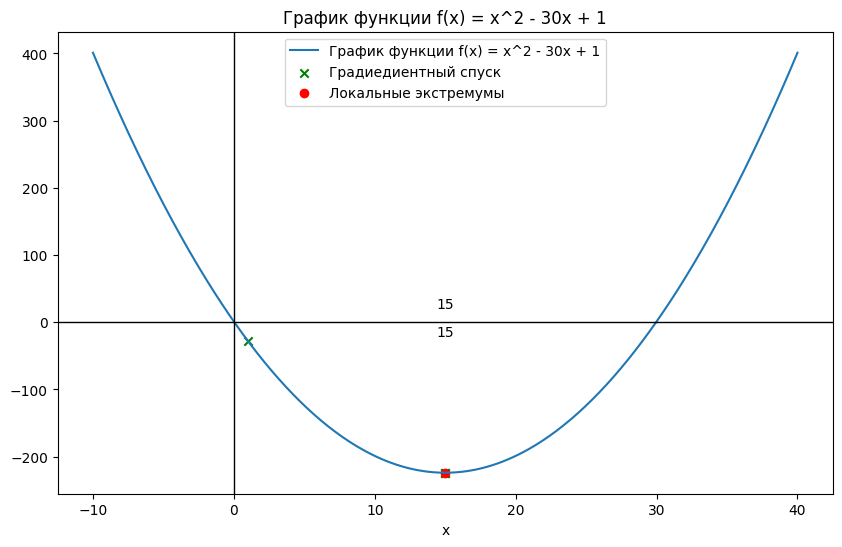

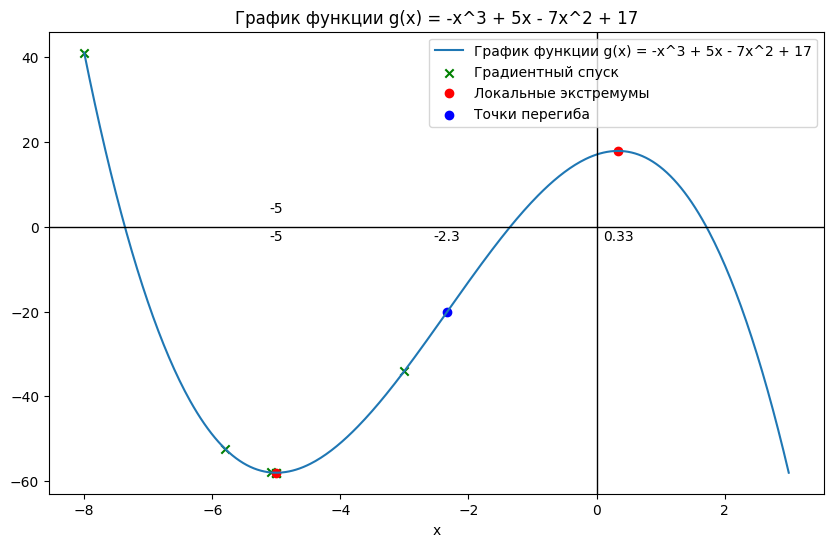

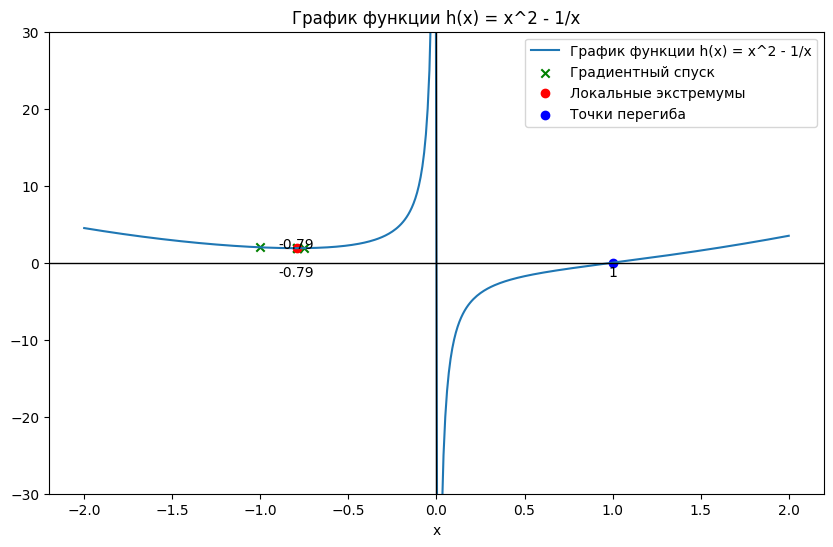

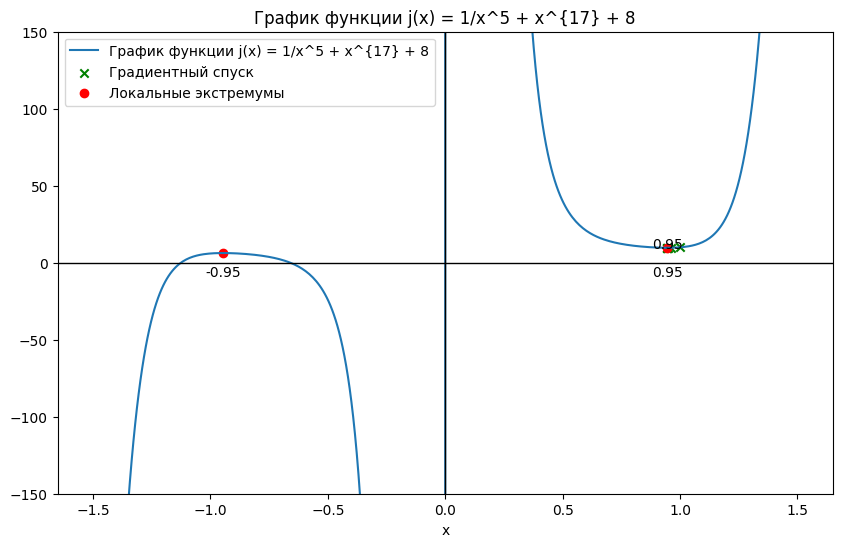

<module 'matplotlib.pyplot' from '/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [269]:
plot_function(f, x_vals_f, crit_points_f, bend_points_f, 'График функции f(x) = x^2 - 30x + 1', extra_points=f_trace_2, extra_points_color='green', extra_points_label='Градиедиентный спуск')
plot_function(g, x_vals_g, crit_points_g, bend_points_g, 'График функции g(x) = -x^3 + 5x - 7x^2 + 17', extra_points=g_trace_2, extra_points_color='green', extra_points_label='Градиентный спуск')
plot_function(h, x_vals_h, crit_points_h, bend_points_h, 'График функции h(x) = x^2 - 1/x', y_limits=(-30, 30), extra_points=h_trace_2, extra_points_color='green', extra_points_label='Градиентный спуск')
plot_function(j, x_vals_j, crit_points_j, bend_points_j, 'График функции j(x) = 1/x^5 + x^{17} + 8', y_limits=(-150, 150), extra_points=j_trace_2, extra_points_color='green', extra_points_label='Градиентный спуск')

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [185]:
# your code here
params = [
    {
        "x_start": -3.0,
        "learning_rate": 0.5,
        "func": f,
        "diff": f_diff,
        "diff2": f_diff2,
        "the_point": 15.0,
        "txt": "f(x) = x^2 - 30x + 1",
    },
    {
        "x_start": -3.0,
        "learning_rate": 0.1,
        "func": g,
        "diff": g_diff,
        "diff2": g_diff2,
        "the_point": -5.0,
        "txt": "g(x) = -x^3 + 5x - 7x^2 + 17",
    },
    {
        "x_start": -3.0,
        "learning_rate": 0.2,
        "func": h,
        "diff": h_diff,
        "diff2": h_diff2,
        "the_point": -2**(2/3)/2,
        "txt": "h(x) = x^2 - 1/x",
    },
    {
        "x_start": 1.0,
        "learning_rate": 0.01,
        "func": j,
        "diff": j_diff,
        "diff2": j_diff2,
        "the_point": 17**(21/22)*5**(1/22)/17,
        "txt": "j(x) = 1/x^5 + x^{17} + 8",
    },
]


In [271]:
average_trace_delta = 0
average_trace_newton = 0
score = {"delta": 0, "newton": 0}

for param in params:
    x_start = param["x_start"]
    learning_rate = param["learning_rate"]
    func = param["func"]
    diff = param["diff"]
    diff2 = param["diff2"]
    the_point = param["the_point"]
    txt = param["txt"]

    print(f'\n{txt}')
    _, trace_delta, is_stop = gradient_descent_new(func, diff, x_start, learning_rate, epsilon=1e-5, delta=1e-5, num_iterations=500)
    print(f"Дельта: шагов {len(trace_delta)-1}")
    average_trace_delta += len(trace_delta)-1
    if not is_stop:
        print("Нужно больше шагов для Дельты!")
    
    _, trace_newton, is_stop = gradient_descent_Newton(func, diff, diff2, x_start, epsilon=1e-5, num_iterations=500)
    print(f"Ньютон: шагов {len(trace_newton)}")
    average_trace_newton += len(trace_newton)-1
    if not is_stop:
        print("Нужно больше шагов для Ньютона!") 
    

    x_min_delta10, _, is_stop = gradient_descent_new(func, diff, x_start, learning_rate, epsilon=1e-5, delta=1e-5, num_iterations=10, stop_at_num=True)
    x_min_newton10, _, is_stop = gradient_descent_Newton(func, diff, diff2, x_start, epsilon=1e-5, num_iterations=10, stop_at_num=True)
    print(f"Дельта: x_min={x_min_delta10}, x_min_real={the_point}, delta={abs(x_min_delta10-the_point)} ")
    print(f"Ньютон: x_min={x_min_newton10}, x_min_real={the_point}, delta={abs(x_min_newton10-the_point)} ")
    if abs(x_min_delta10-the_point) < abs(x_min_newton10-the_point):
        score["delta"] += 1
        print("Дельта лучше")
    elif abs(x_min_delta10-the_point) > abs(x_min_newton10-the_point):
        score["newton"] += 1
        print("Ньютон лучше")
    else:
        score["delta"] += 1
        score["newton"] += 1
        print("Ничья")

average_trace_delta /= len(params)
average_trace_newton /= len(params)

print(f"\nСреднее число итераций для Дельты: {average_trace_delta}")
print(f"Среднее число итераций для Ньютона: {average_trace_newton}")
print(f"\nСчет точности при N=10: Дельта - {score['delta']}, Ньютон - {score['newton']}")


f(x) = x^2 - 30x + 1
Дельта: шагов 1
Ньютон: шагов 3
Дельта: x_min=15.0000000000000, x_min_real=15.0, delta=0 
Ньютон: x_min=15.0, x_min_real=15.0, delta=0.0 
Ничья

g(x) = -x^3 + 5x - 7x^2 + 17
Дельта: шагов 1
Ньютон: шагов 7
Дельта: x_min=-5.00000000000000, x_min_real=-5.0, delta=0 
Ньютон: x_min=-5.0, x_min_real=-5.0, delta=0.0 
Ничья

h(x) = x^2 - 1/x
Дельта: шагов 10
Ньютон: шагов 10
Дельта: x_min=-0.793700097988884, x_min_real=-0.7937005259840997, delta=4.27995215490640E-7 
Ньютон: x_min=-0.7937005259840998, x_min_real=-0.7937005259840997, delta=1.1102230246251565e-16 
Ньютон лучше

j(x) = 1/x^5 + x^{17} + 8
Дельта: шагов 21
Ньютон: шагов 5
Дельта: x_min=0.946395215890669, x_min_real=0.9458926861215569, delta=0.000502529769112581 
Ньютон: x_min=0.9458926861215569, x_min_real=0.9458926861215569, delta=0.0 
Ньютон лучше

Среднее число итераций для Дельты: 8.25
Среднее число итераций для Ньютона: 5.25

Счет точности при N=10: Дельта - 2, Ньютон - 4


## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

$v_k= -\alpha \cdot \nabla f(x_{k-1}) + b \cdot v_{k-1}$  
$x_{k} = x_{k-1} + v_k$


In [273]:
def gradient_descent_momentum(f, df, x_start, learning_rate=0.01, momentum=0.9, epsilon=1e-6, num_iterations=100, stop_at_num=False):
    """
    Выполняет градиентный спуск с методом Momentum для минимизации функции f.

    Args:
        f (sympy.core): Функция, которую нужно минимизировать (объект SymPy).
        df (sympy.core): Производная функции f (объект SymPy).
        x_start (float): Начальное значение для x.
        learning_rate (float): Скорость обучения.
        momentum (float): Коэффициент момента.
        epsilon (float): Порог для остановки (по изменению x).
        num_iterations (int): Максимальное количество итераций.

    Returns:
        float: Минимальное значение x.
        list: След в виде списка значений x.
    """
    
    x_curr = x_start
    trace = [x_curr]
    v = 0  # Инициализация скорости

    for i in range(num_iterations):
        gradient = float(df.subs(x, x_curr))

        # Обновляем скорость
        v = momentum * v - learning_rate * gradient
        
        x_new = x_curr + v
        trace.append(float(x_new))

        # Условие остановки по изменению x, если не нужно идти до конца
        if (abs(x_new - x_curr) < epsilon) and (not stop_at_num):
            return x_new, trace, True

        x_curr = x_new

    return x_curr, trace, False


In [274]:
# Проверка

# x_start = random.uniform(-10, 10) 
x_start = 0.95

min_x, trace, is_stop = gradient_descent_momentum(j, j_diff, x_start, num_iterations=500)

print(f"{x_start=}, {min_x=}, f(x_min)={j.subs(x, min_x)}, {is_stop=}")
print(f"След {len(trace)-1} шагов: {trace}")


x_start=0.95, min_x=0.945847755473217, f(x_min)=9.70908815413912, is_stop=True
След 86 шагов: [0.95, 0.9431971734291902, 0.9413961340844622, 0.9469245249714568, 0.9502164236626466, 0.9460102129416266, 0.9420336909317147, 0.944608438164724, 0.9489982816895263, 0.9478306205692032, 0.943603764192847, 0.9434761985401134, 0.9472405900133283, 0.9484258227787907, 0.9453291382970533, 0.9434546977366784, 0.9456810250351653, 0.9480280432422385, 0.9466375099686698, 0.9441723704400492, 0.9447243785751871, 0.947107677137493, 0.947268398603484, 0.9451645832404199, 0.9444492778005305, 0.9461331903954685, 0.9472577629857242, 0.9460389106714457, 0.9447043568428235, 0.9454218982082889, 0.946830386126461, 0.9465686693948353, 0.9452320004454202, 0.9450983813042876, 0.9462629703289489, 0.9467088168439048, 0.9457797733633031, 0.9451268696598452, 0.9457781873761382, 0.9465501810977329, 0.9461740622711997, 0.9453780786705908, 0.9454952109696393, 0.9462447840839613, 0.9463467467078028, 0.9456996680513311, 0.94

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [275]:
for param in params:
    x_start = param["x_start"]
    learning_rate = param["learning_rate"]
    func = param["func"]
    diff = param["diff"]
    diff2 = param["diff2"]
    the_point = param["the_point"]
    txt = param["txt"]

    print(f'\n{txt}')
    min_x, trace, is_stop = gradient_descent_momentum(func, diff, x_start, num_iterations=5000)
    print(f"{x_start=}, {min_x=}, f(x_min)={f.subs(x, min_x)}, {is_stop=}")
    print(f"След {len(trace)-1} шагов: {trace}")      
    


f(x) = x^2 - 30x + 1
x_start=-3.0, min_x=14.999911473153636, f(x_min)=-223.999999992163, is_stop=True
След 232 шагов: [-3.0, -2.64, -1.9632, -1.014816, 0.15902592000000015, 1.5123031296000002, 3.0000065556480005, 4.578939507978241, 6.208400374915892, 7.85074714766146, 9.471844300179242, 11.041394851441662, 12.533162450549007, 13.925090040734636, 15.19932307108701, 16.342146336982406, 17.343844349548615, 18.19849567386723, 18.90371195227664, 19.460332363799576, 19.872084086894226, 20.145218955941527, 20.288135958965267, 20.310998542507328, 20.225354896845037, 20.043768517812072, 19.779465406326164, 19.446003297862323, 19.05696733428762, 18.625695620384636, 18.165037165464256, 17.687143812726628, 17.20329691900823, 16.72376877628151, 16.25771807230183, 15.813118077274083, 15.396715720203629, 15.014019284436147, 14.66931210655669, 14.365689404334045, 14.105115184246984, 13.88849608248369, 13.71576896924705, 13.585999187949133, 13.497486401022025, 13.447875164767188, 13.434267548842492, 1

SGD Momentum не смог найти точку минимума ф-ции $j=1/x^5 + x^{17} + 8$ даже при выборе "хорошей" стартовой точки $x_0=1$, с чем справлялись предыдущие методы.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Кот Яны Журович	(@janinaal)